In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# About 
* State_Name - Name of the state in India. 
* District_Name - Name of the district in the state. 
* Crop_Year - Year of the crop production. 
* Season - Season of the crop production. 
* Area - Area of land used for crop production. 
* Production - Amount of crop produced. 

#### Importing Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
pd.options.display.max_columns=50

In [8]:
df=pd.read_csv("crop_production.csv")
df.sample(5)

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
32339,32339,Bihar,GOPALGANJ,2009,Kharif,Mesta,12.0,86.0
203809,203809,Uttar Pradesh,BANDA,2011,Rabi,Garlic,3.0,16.0
123561,123561,Madhya Pradesh,TIKAMGARH,2004,Rabi,Urad,17.0,5.0
194626,194626,Telangana,NALGONDA,2003,Rabi,Groundnut,16060.0,16269.0
129909,129909,Maharashtra,JALGAON,2006,Kharif,Urad,56500.0,29900.0


## WORKFLOW 
* Understanding of Data
* Data Cleaning
* Exploratory Data Analysis
* Insights

# Understanding of Data

In [9]:
df.shape

(246091, 8)

In [10]:
### Checking column names
df.columns

Index(['index', 'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production'],
      dtype='object')

In [11]:
### checking basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          246091 non-null  int64  
 1   State_Name     246091 non-null  object 
 2   District_Name  246091 non-null  object 
 3   Crop_Year      246091 non-null  int64  
 4   Season         246091 non-null  object 
 5   Crop           246091 non-null  object 
 6   Area           246091 non-null  float64
 7   Production     242361 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.0+ MB


In [13]:
df.dtypes

index              int64
State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [14]:
### checking null values
df.isnull().sum().sort_values(ascending=False)

Production       3730
index               0
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
dtype: int64

#### Peroduction has missing values

In [15]:
df[df["Production"].isnull()]

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...,...
244128,244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [16]:
df.duplicated().sum()

0

#### No duplicate values

# Data Cleaning

In [17]:
## Drop Column index 
df.drop(columns=["index"],inplace=True)

#### Drop column Index as it is not providing any usefull information 

In [18]:
### checking missing values percentage
for i in df.columns:
    if df[i].isnull().any():
        print(i,"-------",df[i].isnull().sum()*100/df.shape[0],"%")

Production ------- 1.5156994770227274 %


In [19]:
df["Production"].median()

729.0

<AxesSubplot:xlabel='Production'>

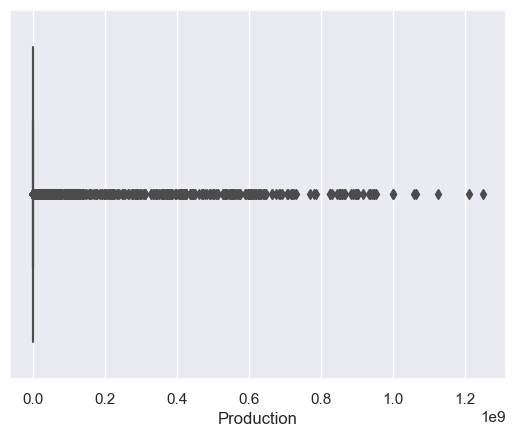

In [20]:
sns.boxplot(x="Production",data=df)

In [21]:
## Filling the missing values
df["Production"].fillna(df["Production"].median(),inplace=True)

In [22]:
df["Production"].isnull().sum()

0

#### Missing values filled with median

In [23]:
### Basic Statistical data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,246091.0,573685.490072,1.693613e+07,0.00,91.0,729.0,6769.0,1.250800e+09


In [24]:
df.describe(include="object").T

,count,unique,top,freq
State_Name,246091,33,Uttar Pradesh,33306
District_Name,246091,646,BIJAPUR,945
Season,246091,6,Kharif,95951
Crop,246091,124,Rice,15104


In [25]:
### Checking correlation
df.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006827
Area,-0.026022,1.000000,0.040655
Production,0.006827,0.040655,1.000000


<AxesSubplot:>

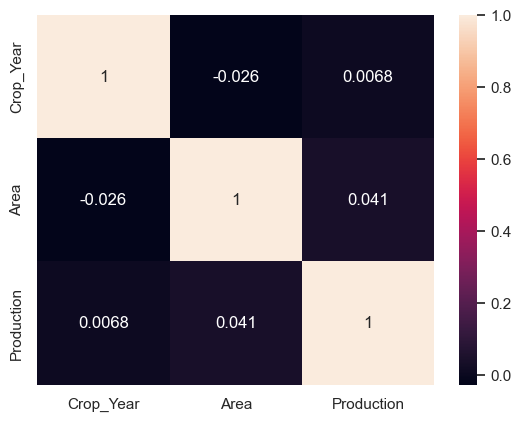

In [26]:
sns.heatmap(df.corr(),annot=True)

#### There is no strong correlation 

In [27]:
### Checking unique values
for i in df.columns:
    print(i,"---",df[i].unique())

State_Name --- ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
District_Name --- ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRA

# Exploratory Data Analysis

In [28]:
df.sample(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
208763,Uttar Pradesh,ETAWAH,2002,Kharif,Maize,5898.0,9904.0
90618,Karnataka,KODAGU,1997,Kharif,Black pepper,1385.0,393.0


Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

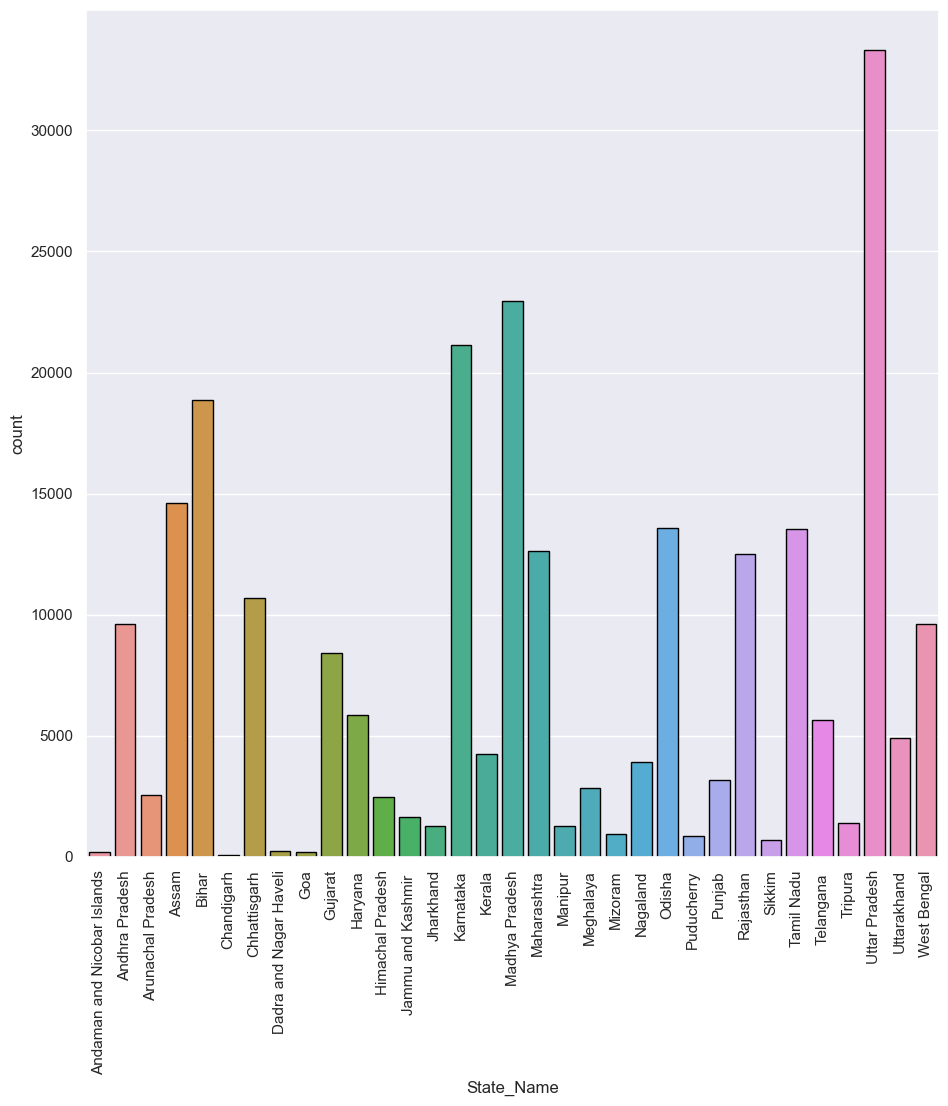

In [29]:
### which states has highest no of crops produced
print(df["State_Name"].value_counts())
plt.figure(figsize=(11,11))
sns.countplot(x="State_Name",data=df,edgecolor="black")
plt.xticks(rotation=90);

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64


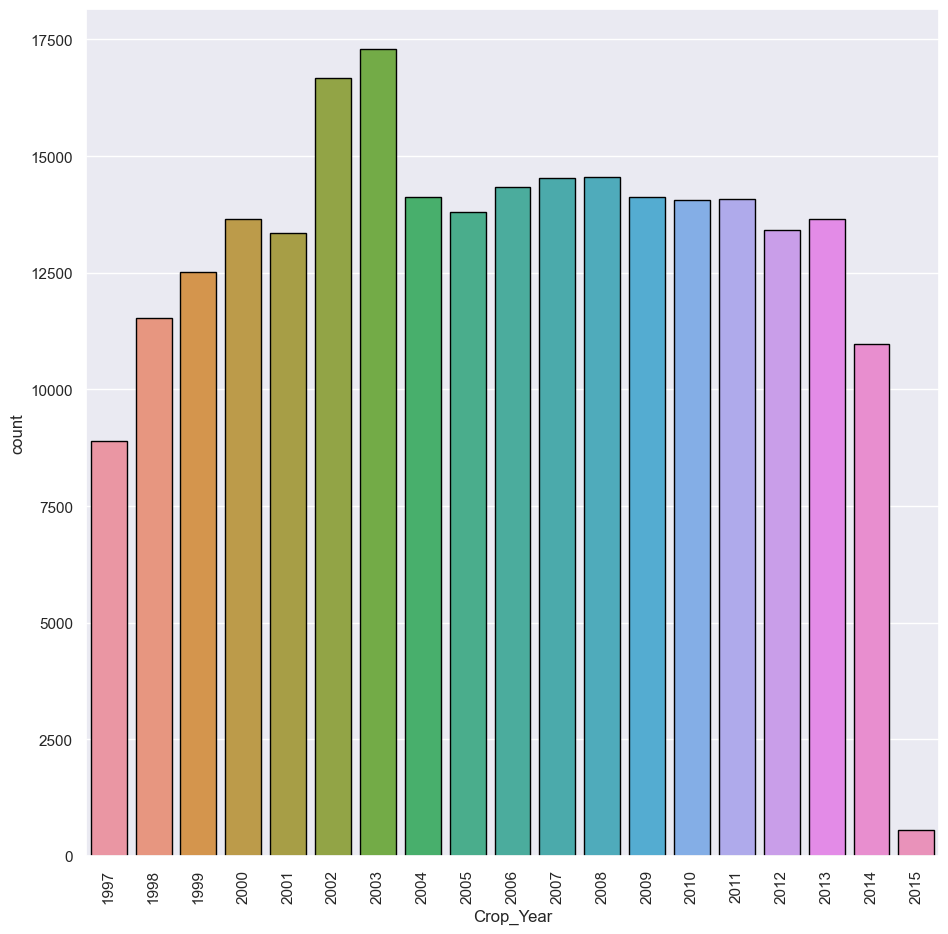

In [30]:
### which is the most occuring year 
print(df["Crop_Year"].value_counts())
plt.figure(figsize=(11,11))
sns.countplot(x="Crop_Year",data=df,edgecolor="black")
plt.xticks(rotation=90);

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64


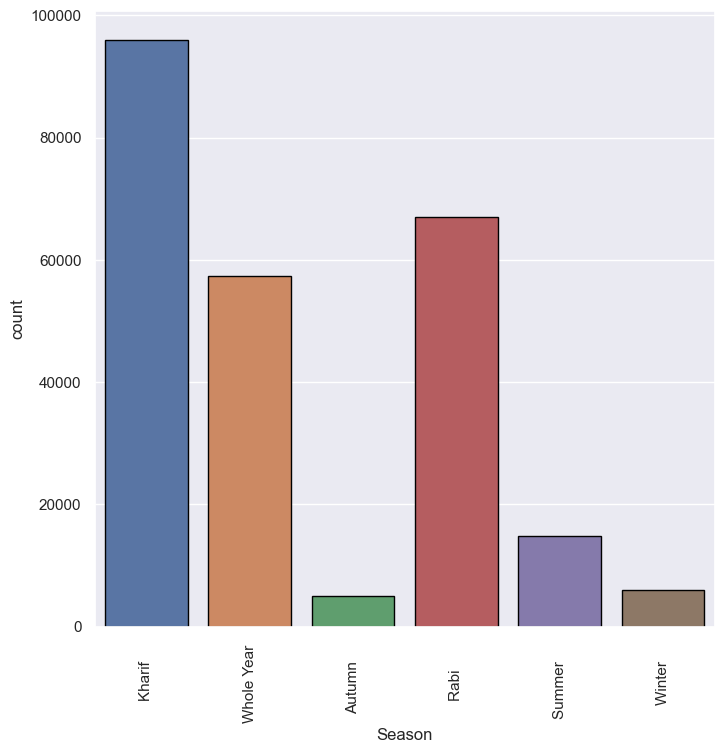

In [31]:
### which season is most occoured
print(df["Season"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x="Season",data=df,edgecolor="black")
plt.xticks(rotation=90);


Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: Crop, dtype: int64


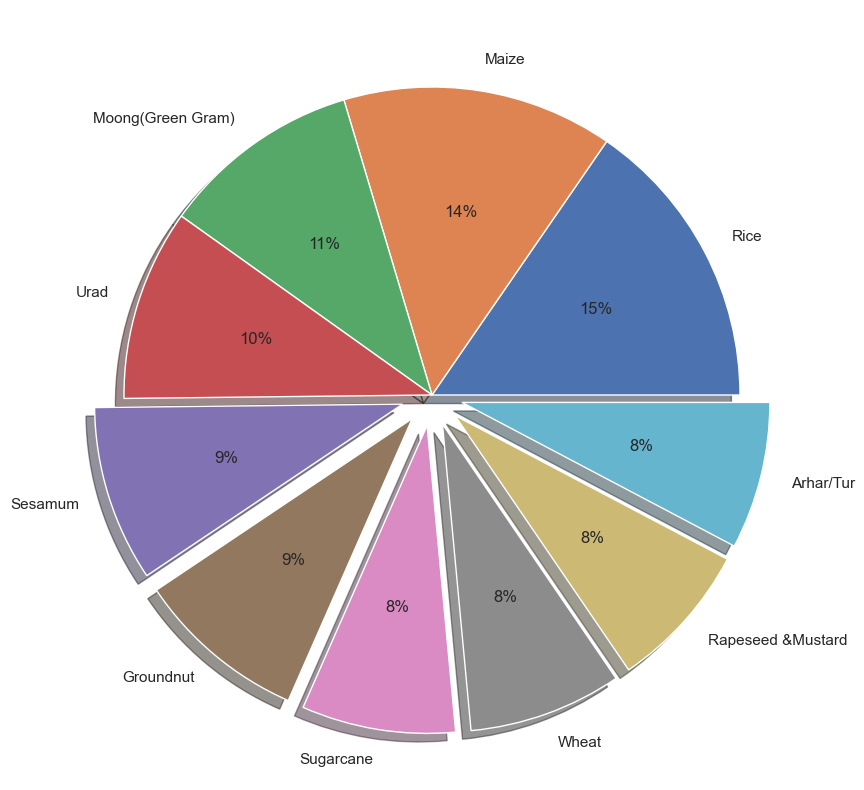

In [32]:
##Top 10 most occouring crops
x= df["Crop"].value_counts().head(10)
print(x)
plt.figure(figsize=(10,10))
plt.pie(x,labels=df["Crop"].value_counts().head(10).index,autopct= "%0.0f%%",shadow=True,explode=[0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1]);

In [33]:
df.sample(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
223254,Uttar Pradesh,MIRZAPUR,2008,Kharif,Dry chillies,1413.0,1409.0
134388,Maharashtra,PUNE,2009,Rabi,Wheat,59600.0,91800.0


Crop
Coconut      1.299816e+11
Sugarcane    5.535750e+09
Rice         1.605486e+09
Name: Production, dtype: float64


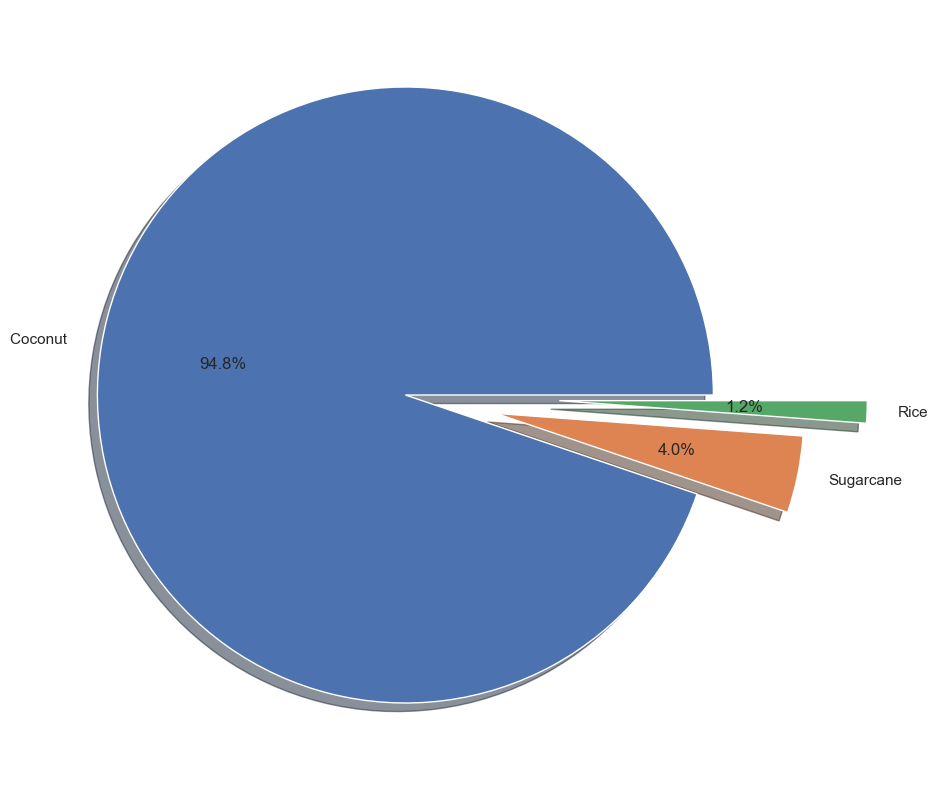

In [34]:
## Which  has the highest production of crops
c=df.groupby(["Crop"])["Production"].sum().sort_values(ascending=False).head(3)
print(c)
plt.figure(figsize=(10,10))
plt.pie(c,labels=df.groupby(["Crop"])["Production"].sum().sort_values(ascending=False).head(3).index,autopct="%0.01f%%",shadow=True,explode=[0,0.30,0.50]);

State_Name
Kerala                         9.788023e+10
Andhra Pradesh                 1.732464e+10
Tamil Nadu                     1.207665e+10
Uttar Pradesh                  3.234578e+09
Assam                          2.111756e+09
West Bengal                    1.397916e+09
Maharashtra                    1.263737e+09
Karnataka                      8.634612e+08
Andaman and Nicobar Islands    7.182247e+08
Punjab                         5.864069e+08
Gujarat                        5.243431e+08
Goa                            5.057565e+08
Madhya Pradesh                 4.490879e+08
Puducherry                     3.847274e+08
Haryana                        3.822471e+08
Bihar                          3.664916e+08
Telangana                      3.351902e+08
Rajasthan                      2.816469e+08
Odisha                         1.609412e+08
Uttarakhand                    1.322291e+08
Chhattisgarh                   1.012005e+08
Himachal Pradesh               1.783287e+07
Jammu and Kashmir    

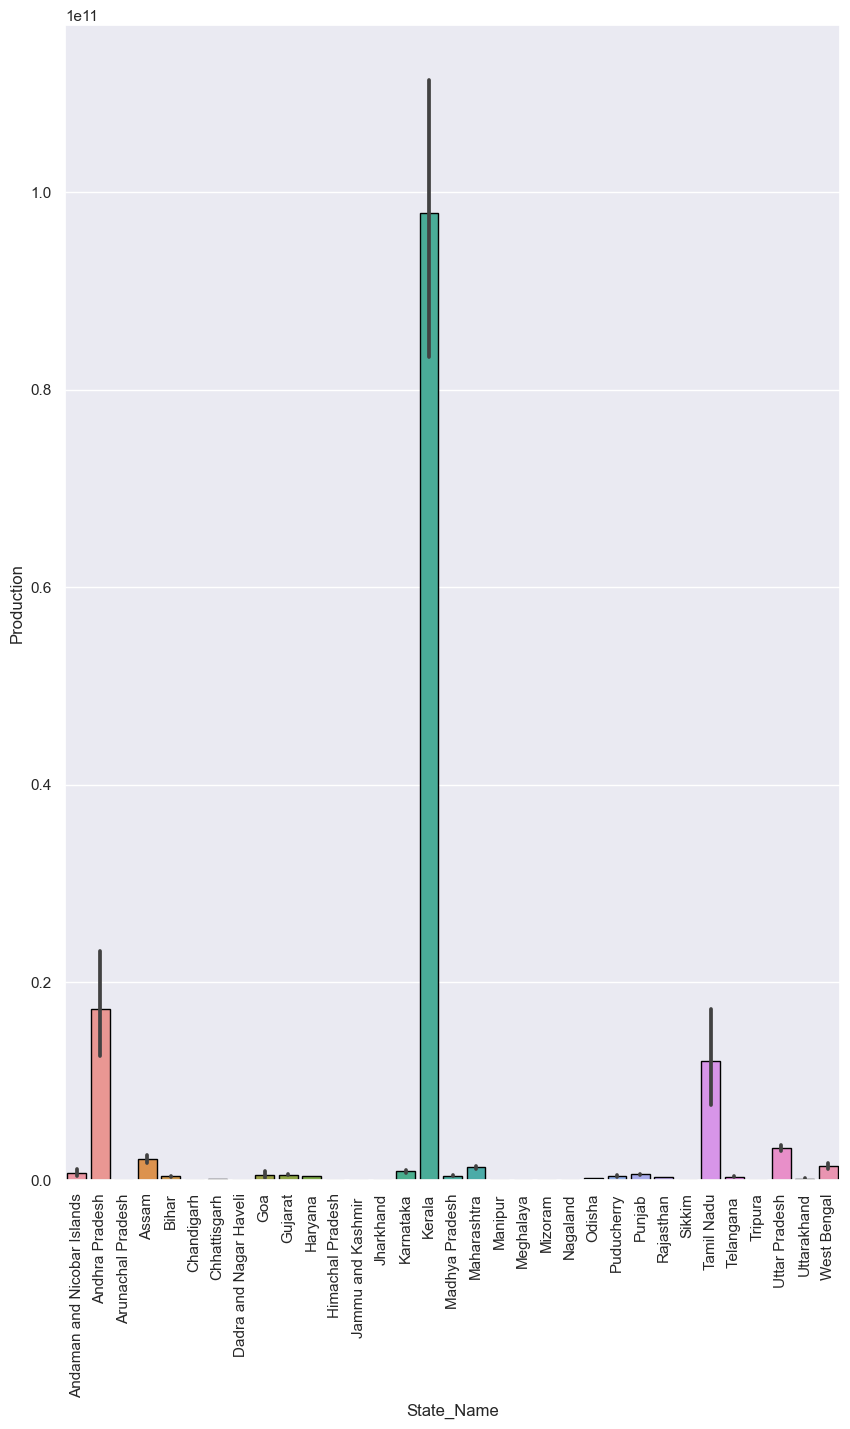

In [35]:
## Which State has the highest production 
print(df.groupby("State_Name")["Production"].sum().sort_values(ascending=False))
plt.figure(figsize=(10,15))
sns.barplot(x="State_Name",y="Production",edgecolor="black",estimator=sum,data=df)
plt.xticks(rotation=90);

        District_Name    Production
0           KOZHIKODE  1.528076e+10
1          MALAPPURAM  1.451842e+10
2  THIRUVANANTHAPURAM  1.002273e+10
3            THRISSUR  9.923514e+09
4              KANNUR  9.783457e+09
5       EAST GODAVARI  8.271064e+09
6           KASARAGOD  7.732240e+09
7              KOLLAM  7.151966e+09
8            PALAKKAD  6.369395e+09
9           ERNAKULAM  5.021661e+09


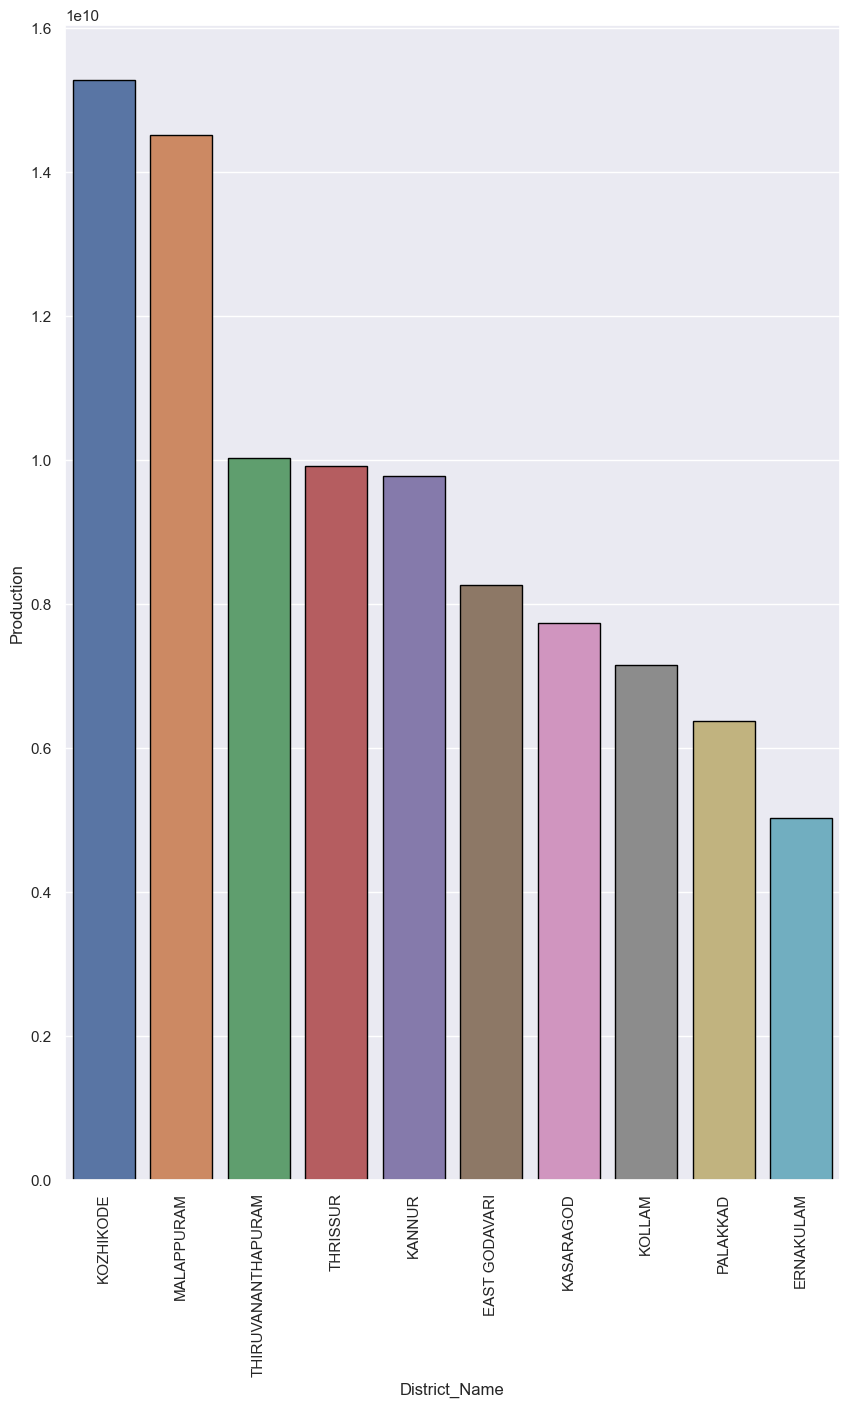

In [36]:

# Which top 10 District has the highest crop production
d=df.groupby(["District_Name"])["Production"].sum().sort_values(ascending=False).reset_index().head(10)
print(d)
plt.figure(figsize=(10,15))
sns.barplot(x="District_Name",y="Production",edgecolor="black",estimator=sum,data=d)
plt.xticks(rotation=90);

In [37]:
## Which is the maximum and minimum production crop
df[df["Production"]==df["Production"].max()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011,Whole Year,Coconut,82704.0,1.250800e+09


In [38]:
df[df["Production"]==df["Production"].min()].sort_values(by="Production",ascending=False).head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
397,Andhra Pradesh,ANANTAPUR,2002,Kharif,Soyabean,51.0,0.0
170839,Rajasthan,JAIPUR,2002,Rabi,Other Rabi pulses,1.0,0.0
170460,Rajasthan,HANUMANGARH,2002,Whole Year,Grapes,6.0,0.0
170463,Rajasthan,HANUMANGARH,2002,Whole Year,Other Fresh Fruits,161.0,0.0
170464,Rajasthan,HANUMANGARH,2002,Whole Year,Other Vegetables,922.0,0.0


In [39]:
df.sample(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
135908,Maharashtra,SINDHUDURG,1998,Kharif,Sesamum,200.0,100.0
52201,Chhattisgarh,KORBA,2003,Kharif,Jowar,414.0,332.0


           Crop          Area
0          Rice  7.471253e+08
1         Wheat  4.707136e+08
2  Cotton(lint)  1.565681e+08
3         Bajra  1.411408e+08
4         Jowar  1.377159e+08


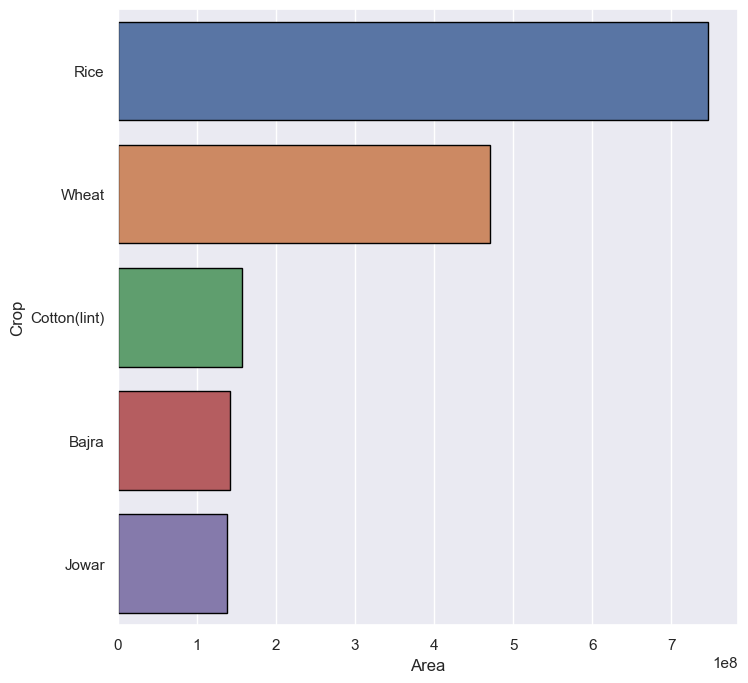

In [40]:
## Which top 5 Crop took the maximum piece of area 
top=df.groupby("Crop")["Area"].sum().sort_values(ascending=False).head().reset_index()
print(top)
plt.figure(figsize=(8,8))
sns.barplot(x="Area",y="Crop",data=top,edgecolor="black");

In [41]:
#Which state in India had the second lowest crop production
df.groupby(["State_Name"])["Production"].sum().sort_values(ascending=False).tail(2)


State_Name
Mizoram       1663726.83
Chandigarh      64685.50
Name: Production, dtype: float64

#### Mizoram had the second lowest crop production

In [42]:
## Which year has the highest crop production 
df.groupby(["Crop_Year","Crop"])["Production"].sum().sort_values(ascending=False).reset_index().head(5)


,Crop_Year,Crop,Production
0,2011,Coconut,1.359422e+10
1,2013,Coconut,1.221919e+10
2,2006,Coconut,8.092567e+09
3,2014,Coconut,8.067815e+09
4,2004,Coconut,7.663984e+09



#### 2011 has the highest crop production and the most crop produced is coconut

In [43]:
## Which is the least producted crop in 2011
x= df[df["Crop_Year"]==2011]
x.groupby("Crop")["Production"].sum().sort_values(ascending=False).reset_index().tail(5)


,Crop,Production
57,Sannhamp,18606.0
58,Cardamom,5615.0
59,Brinjal,694.0
60,Blackgram,450.0
61,Mango,401.0


#### Mongo is the least produced crop in 2011 where this is the year in which production is the highest 


Season
Whole Year     1.344257e+11
Kharif         4.031186e+09
Rabi           2.052290e+09
Winter         4.345557e+08
Summer         1.706798e+08
Autumn         6.442762e+07
Name: Production, dtype: float64


<AxesSubplot:xlabel='Production', ylabel='Season'>

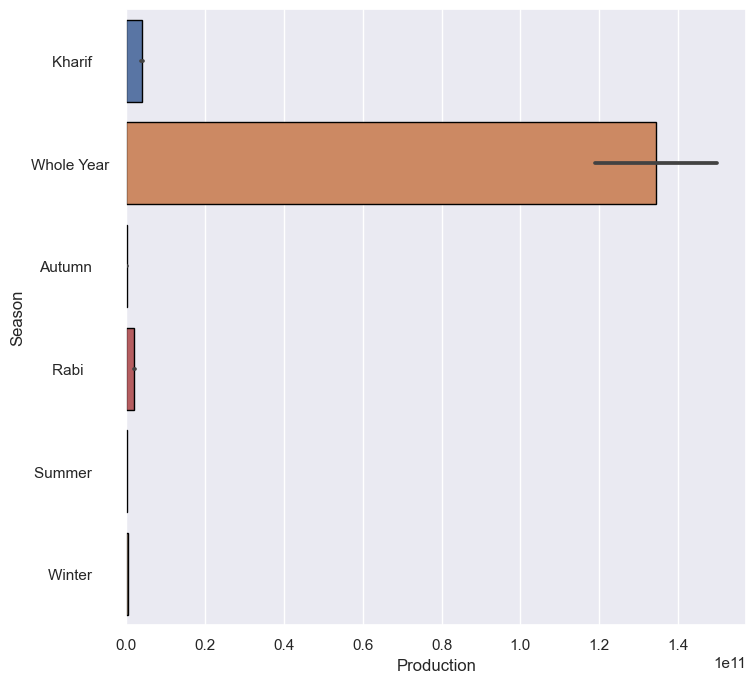

In [44]:
## Which season has the highest production 
print(df.groupby("Season")["Production"].sum().sort_values(ascending=False))
plt.figure(figsize=(8,8))
sns.barplot(x="Production",y="Season",data=df,edgecolor="black",estimator=sum)



In [45]:
## Which State has the largest and lowest area for production 
df.groupby("State_Name")["Area"].max().sort_values(ascending=False).to_frame().head(1)

,Area
State_Name,
West Bengal,8580100.0


In [46]:
df.groupby("State_Name")["Area"].max().sort_values(ascending=False).to_frame().tail(1)

,Area
State_Name,
Chandigarh,880.0


#### West Bengal has the highest area for production and chandigarh has lowest area for production 

In [47]:
k=df[df["Season"]=="Kharif     "]
k.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(2).to_frame()


,Production
Crop,
Sugarcane,1.774444e+09
Rice,9.416668e+08


In [48]:
w=df[df["Season"]=="Whole Year "]
w.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(2).to_frame()


,Production
Crop,
Coconut,1.299815e+11
Sugarcane,3.745242e+09


In [49]:
a=df[df["Season"]=="Autumn     "]
a.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(2).to_frame()


,Production
Crop,
Rice,51855942.54
Maize,8933762.65


In [50]:
r=df[df["Season"]=="Rabi       "]
r.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(2).to_frame()


,Production
Crop,
Wheat,1.323902e+09
Potato,2.051821e+08


In [51]:
s=df[df["Season"]=="Summer     "]
s.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(2).to_frame()

,Production
Crop,
Rice,1.277057e+08
Maize,1.392567e+07


In [52]:
wi=df[df["Season"]=="Winter     "]
wi.groupby("Crop")["Production"].sum().sort_values(ascending=False).head(2).to_frame()


,Production
Crop,
Rice,3.815695e+08
Paddy,1.931804e+07


In [53]:
df.groupby(["District_Name","Crop"])["Production"].sum().sort_values(ascending=False).head(3).to_frame()

,,Production
District_Name,Crop,
KOZHIKODE,Coconut,1.527871e+10
MALAPPURAM,Coconut,1.451252e+10
THIRUVANANTHAPURAM,Coconut,1.001337e+10


# Insights 

* Uttar Pradesh has the most crops produced
* Rice is Produced in most of the states.
* In 2011 the production was the highest in which Coconut is highly produced and mango is the least produced
* Kharif is the most occuring season in which Sugarcane and rice has the highest production.
* In Whole Year Coconut and sugarcare has the highest production
* In Summer and Autumn season Rice and maize has the highest production 
* In Rabi Season Wheat and Potato has the highest Production 
* In Winter season Rice and Paddy has the highest production
* Coconut, Sugarcane and Rice has the highest production 
* Kerela has the highest production of crops where as mizoram and chandigarh has the lowest production state of the crops 
* KOZHIKODE,MALAPPURAM and THIRUVANANTHAPURAM District hast the highest production among other Districts, and the crop they produced is Coconut
* Rice, Wheat and Cotton has the maximum Area for production
* West Bengal has the highest area for production and chandigarh has lowest area for production

In [54]:
df.to_csv("IndianCrop")